In [1]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import scipy.io 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean
from mcsm_benchmarks.Benchmark import Benchmark
from mcsm_benchmarks.SignalBank import SignalBank
from src.utilities.spatstats_utils import compute_rank_envelope_test, generate_white_noise_zeros_pp
from src.utilities.utilstf import get_spectrogram,find_zeros_of_spectrogram

In [2]:
# rng
np.random.seed(1) 

# signal parameters
SNRin = 10
N = 2**8
Nsub=None
sbank = SignalBank(N=N,)
# s = sbank.signal_linear_chirp()
s = sbank.signal_mc_double_cos_chirp()

noise = np.random.randn(N,)
signal, scaled_noise = Benchmark.sigmerge(s,noise,SNRin, return_noise=True)

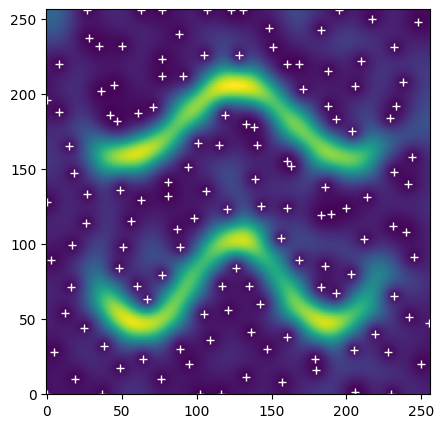

In [3]:
Nfft = 2*N
S, stft = get_spectrogram(signal)
ceros = find_zeros_of_spectrogram(S)
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.imshow(abs(stft[0:N+1]), origin='lower')#, cmap=cmocean.cm.deep)
ax.plot(ceros[:,1],ceros[:,0],'w+')
plt.show()

In [4]:
nsim=2499
list_ppp = generate_white_noise_zeros_pp(N,nsim=nsim)

In [5]:
output_dic_1 = compute_rank_envelope_test(signal,
                                        fun='Fest', 
                                        correction='rs', 
                                        return_dic=True,
                                        nsim=nsim,
                                        ppp_sim=list_ppp,
                                        rmin=0,
                                        rmax=1.2,
                                        alternative='two.sided'
                                        )

A curve_set(1d) object with 2500 curves observed at 60 argument values
(1 observed, 2499 simulated).
Contains: 
$ r     :  num [1:60] 0 0.0201 0.0402 0.0603 0.0804 ...
$ funcs :  num [1:60, 1:2500] 0 0.0014 0.00513 0.0106 0.01852 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:60] "1" "2" "3" "4" ...
  ..$ : chr [1:2500] "obs" "sim1" "sim2" "sim3" ...



True 0.6838012598339636


/tmp/ipykernel_27568/371660208.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_size)


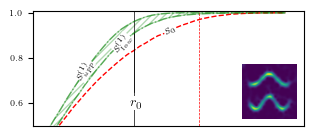

In [6]:
print(output_dic_1['rejectH0'],output_dic_1['r_max_dif'])


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(3.5,1.5)
ax.fill_between(output_dic_1['radi'], output_dic_1['envelope_lo'], output_dic_1['envelope_hi'], facecolor='w', edgecolor='g', alpha=.3, hatch='/////')
ax.plot(output_dic_1['radi'],output_dic_1['envelope_obs'],'r--', linewidth=1.0)
if output_dic_1['rejectH0']:
    ax.plot([output_dic_1['r_max_dif'],output_dic_1['r_max_dif']],[0.65,output_dic_1['envelope_lo'][output_dic_1['ind_max_dif']]],'k', 
        linewidth=0.5)

axins = inset_axes(ax, width=0.55, height=0.55, loc=4)
axins.imshow(S, origin='lower')
# axins.imshow(abs(stft[0:N+1]), origin='lower')
axins.axis('off')
fig.canvas.draw()
axins.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

label_size = 6.0

# Indicate the estimation of r_0
if output_dic_1['rejectH0']:
    ax.plot([output_dic_1['r_max_dif'],output_dic_1['r_max_dif']],
        # [0.5,output_dic['envelope_lo'][output_dic['ind_max_dif']]/np.pi*2],
        [0.5,1.01],
        'k', 
        linewidth=0.5)

# Near optimal r_0:
ax.plot([0.9,0.9],
[0.5,1.01],
'r--', 
linewidth=0.5)  

# r_0 estimation
ax.text(output_dic_1['r_max_dif']*1.01,
        0.6,
        r'$r_{0}$', 
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.6})

# Label the curves:
# Upper envelope:
ax.plot(output_dic_1['radi'],output_dic_1['envelope_hi'], 'g-.', alpha=.5, linewidth=1.0)
xind = np.where(output_dic_1['radi']>=0.52)[0][0]
xcoord = output_dic_1['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic_1['envelope_hi'][xind+1]-output_dic_1['envelope_hi'][xind])/
                 (output_dic_1['radi'][xind+1]-output_dic_1['radi'][xind]))
ax.text(xcoord,output_dic_1['envelope_hi'][xind]*1.0,
        r'$S^{(1)}_{upp}$', 
        fontsize=label_size,
        rotation=angle,
        horizontalalignment='center', 
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01})

# Lower envelope:
ax.plot(output_dic_1['radi'],output_dic_1['envelope_lo'], 'g-.', alpha=.5, linewidth=1.0)
xind = np.where(output_dic_1['radi']>=0.64)[0][0]
xcoord = output_dic_1['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic_1['envelope_lo'][xind+3]-output_dic_1['envelope_lo'][xind-4])/
                 (output_dic_1['radi'][xind+3]-output_dic_1['radi'][xind-4]))
ax.text(xcoord,output_dic_1['envelope_lo'][xind],
        r'$S^{(1)}_{low}$', 
        rotation=angle,
        fontsize=label_size, 
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01})

# Observed envelope:
xind = np.where(output_dic_1['radi']>=0.8)[0][0]
xcoord = output_dic_1['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic_1['envelope_obs'][xind+2]-output_dic_1['envelope_obs'][xind])/
                 (output_dic_1['radi'][xind+2]-output_dic_1['radi'][xind]))
ax.text(xcoord,output_dic_1['envelope_obs'][xind],
        r'$S_{0}$', 
        rotation=angle,
        fontsize=label_size,
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.6})

ax.set_xlim([0.35, 1.25])
ax.set_ylim([0.5, 1.01])
ax.set_xticklabels([], fontsize=label_size)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_size)
# ax.set(xlabel=r'$r$',ylabel=r'$F(r)$')
ax.set(xlabel='',ylabel='')
ax.tick_params(axis='x', bottom=False)


fig.savefig('figures/adaptive_thr_scale_F.pdf', dpi=900, transparent=False, bbox_inches='tight')

In [7]:
nsim=2499
# signal, noise = add_snr(s,SNRin)
output_dic = compute_rank_envelope_test(signal,
                                        fun='Fest', 
                                        correction='rs',
                                        return_dic=True,
                                        nsim=nsim,
                                        ppp_sim=list_ppp,
                                        rmin=0.0,
                                        rmax=1.2,
                                        transform='asin(sqrt(.))',
                                        alternative='two.sided'
                                        )                                   

A curve_set(1d) object with 2500 curves observed at 60 argument values
(1 observed, 2499 simulated).
Contains: 
$ r     :  num [1:60] 0 0.0201 0.0402 0.0603 0.0804 ...
$ funcs :  num [1:60, 1:2500] 0 0.0375 0.0717 0.1032 0.1365 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:60] "1" "2" "3" "4" ...
  ..$ : chr [1:2500] "obs" "sim1" "sim2" "sim3" ...



True 0.7843602686330758


/tmp/ipykernel_27568/4151790587.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=label_size)
/tmp/ipykernel_27568/4151790587.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_size)


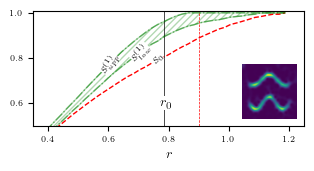

In [8]:
print(output_dic['rejectH0'],output_dic['r_max_dif'])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# New figure of envelopes.
fig, ax = plt.subplots(1,1)
fig.set_size_inches(3.5,1.5)

# Fill between upper and lower envelopes.
ax.fill_between(output_dic['radi'], 
                output_dic['envelope_lo']/np.pi*2, 
                output_dic['envelope_hi']/np.pi*2, 
                facecolor='w', 
                edgecolor='g', 
                alpha=.3, 
                hatch='/////')

# Observed functional statistic.
ax.plot(output_dic['radi'],
        output_dic['envelope_obs']/np.pi*2,
        'r--', 
        linewidth=1.0)

# Indicate the estimation of r_0
if output_dic['rejectH0']:
    ax.plot([output_dic['r_max_dif'],output_dic['r_max_dif']],
        # [0.5,output_dic['envelope_lo'][output_dic['ind_max_dif']]/np.pi*2],
        [0.5,1.01],
        'k', 
        linewidth=0.5)

# Near optimal r_0:
ax.plot([0.9,0.9],
[0.5,1.01],
'r--', 
linewidth=0.5)         

axins = inset_axes(ax, width=0.55, height=0.55, loc=4)
axins.imshow(S, origin='lower')
# axins.imshow(abs(stft[0:N+1]), origin='lower')
axins.axis('off')
fig.canvas.draw()
axins.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

label_size = 6.0

# Label estimated r_0
# ax.text(output_dic['r_max_dif']*1.01,1.0,r'$r_{0}$', horizontalalignment='left')
ax.text(output_dic['r_max_dif']*1.01,
        0.6,
        r'$r_{0}$', 
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.6})


# Label the curves:
# Upper envelope:
ax.plot(output_dic['radi'],
        output_dic['envelope_hi']/np.pi*2, 
        'g-.', 
        alpha=.5, 
        linewidth=1.0)

xind = np.where(output_dic['radi']>=0.6)[0][0]
xcoord = output_dic['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic['envelope_hi'][xind+10]-output_dic['envelope_hi'][xind])/
                 (output_dic['radi'][xind+10]-output_dic['radi'][xind]))

ax.text(xcoord,output_dic['envelope_hi'][xind]/np.pi*2,
        r'$S^{(1)}_{upp}$', 
        fontsize=label_size,
        rotation=angle,
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01})
# Lower envelope:
ax.plot(output_dic['radi'],
        output_dic['envelope_lo']/np.pi*2, 
        'g-.', 
        alpha=.5, 
        linewidth=1.0)

xind = np.where(output_dic['radi']>=0.7)[0][0]
xcoord = output_dic['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic['envelope_lo'][xind+10]-output_dic['envelope_lo'][xind])/(output_dic['radi'][xind+10]-output_dic['radi'][xind]))
ax.text(xcoord,output_dic['envelope_lo'][xind]/np.pi*2,
        r'$S^{(1)}_{low}$', 
        rotation=angle,
        fontsize=label_size, 
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01})

# Observed envelope:
xind = np.where(output_dic['radi']>=0.75)[0][0]
xcoord = output_dic['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic['envelope_obs'][xind+3]-output_dic['envelope_obs'][xind])/
                 (output_dic['radi'][xind+3]-output_dic['radi'][xind]))
ax.text(xcoord,output_dic['envelope_obs'][xind]/np.pi*2,
        r'$S_{0}$', 
        rotation=angle,
        fontsize=label_size,
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.05})

ax.set_xlim([0.35, 1.25])
ax.set_ylim([0.5, 1.01])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=label_size)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_size)
ax.set(xlabel=r'$r$',ylabel='')


fig.savefig('figures/adaptive_thr_scale_Fvs.pdf', dpi=900, transparent=False, bbox_inches='tight')